In [2]:
###
#           1 - fyt price 
# APY = ------------------------
#       (days until maturity)/365
#
#
#
# fyt_price = 1 - APY * (days until maturity)/365
#
#       
#             -                                    -  (-t)
#            |   y_reserves + total_reserves        |
# fyt_price =| ----------------------------------   |
#            |            x_reserves                |
#             -                                    -
#
#                               y_reserves
# x_reserves =  -----------------------------------------
#               (1-(days until maturity)/365)^(-1/t) - 1
#
#
# NOTE: x_reserves calculation assumes that x_reserves == total_supply
###

import math

def calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch):
  t=days_until_maturity/(365*time_stretch)
  T=days_until_maturity/365
  return y_reserves/((1-T*(APY/100))**(-1/t)-1)

def calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch):
  t=days_until_maturity/(365*time_stretch)
  return 1/((y_reserves + total_supply)/x_reserves)**t

def calc_k(in_reserves,out_reserves,t):
  return pow(in_reserves,1-t) + pow(out_reserves,1-t)

def calc_apy(price,days_until_maturity):
  T=days_until_maturity/365
  return (1-price)/T * 100

def is_trade_valid(in_,in_reserves,out_reserves,t):
  k = pow(in_reserves,1-t) + pow(out_reserves,1-t)
  check = math.log(k)/math.log(in_reserves + in_) + t
  return True if check >= 1 else False

def calc_max_trade(in_reserves,out_reserves,t):
  k = pow(in_reserves,1-t) + pow(out_reserves,1-t)
  return k**(1/(1-t)) - in_reserves

def calc_out_given_in(in_,in_reserves,out_reserves,token_out,g,t):
        k=pow(in_reserves,1-t) + pow(out_reserves,1-t)
        without_fee = out_reserves - pow(k-pow(in_reserves+in_,1-t),1/(1-t))
        if token_out == "base":
            fee =  (in_-without_fee)*g
            with_fee = without_fee-fee
        elif token_out == "fyt":
            fee =  (without_fee-in_)*g
            with_fee = without_fee-fee   
        return (with_fee,without_fee,fee)
    

In [2]:
APY = 20
days_until_maturity = 30
time_stretch = 4
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
print("(APY,y_reserves,days_until_maturity,time_stretch): "+str((APY,y_reserves,days_until_maturity,time_stretch)))
print("required x_reserves: " + str(x_reserves))
total_supply=x_reserves
price=calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch)
print("resulting price: " + str(price))
print("check apy: " + str(calc_apy(price,days_until_maturity)))

amount=84.036
g=0.05
t=days_until_maturity/(365*time_stretch)
(with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
without_slippage_or_fee = price * amount
slippage = abs(without_slippage_or_fee-without_fee)
print("\nTrade size: " + str(amount))
print("Price w/o slippage: " + str(without_slippage_or_fee))
print("Price with slippage: " + str(without_fee))
print("Price with slippage and fee: " + str(with_fee))
print("Total fee: " + str(fee))
print("Percent slippage: " + str(slippage/without_slippage_or_fee * 100))
print("check apy: " + str(calc_apy(with_fee/amount,days_until_maturity)))
print("x_reserves = {:} vs price_with_slippage_fee = {:}".format(x_reserves, with_fee))
print("is valid trade = {:}".format(is_trade_valid(amount,y_reserves+total_supply,x_reserves,t)))
print("max valid trade = {:}".format(calc_max_trade(y_reserves+total_supply,x_reserves,t)))

amount=84.03691029661
g=0.05
t=days_until_maturity/(365*time_stretch)

(with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
without_slippage_or_fee = price * amount
slippage = abs(without_slippage_or_fee-without_fee)
print("\nTrade size: " + str(amount))
print("Price w/o slippage: " + str(without_slippage_or_fee))
print("Price with slippage: " + str(without_fee))
print("Price with slippage and fee: " + str(with_fee))
print("Total fee: " + str(fee))
print("Percent slippage: " + str(slippage/without_slippage_or_fee * 100))
print("check apy: " + str(calc_apy(with_fee/amount,days_until_maturity)))
print("x_reserves = {:} vs price_with_slippage_fee = {:}".format(x_reserves, with_fee))
print("is valid trade = {:}".format(is_trade_valid(amount,y_reserves+total_supply,x_reserves,t)))
print("max valid trade = {:}".format(calc_max_trade(y_reserves+total_supply,x_reserves,t)))




(APY,y_reserves,days_until_maturity,time_stretch): (20, 100, 30, 4)
required x_reserves: 80.62004628866757
resulting price: 0.9835616438356165
check apy: 19.99999999999992

Trade size: 84.036
Price w/o slippage: 82.65458630136987
Price with slippage: 80.61936181291111
Price with slippage and fee: 80.44852990355666
Total fee: 0.17083190935444464
Percent slippage: 2.4623249350472345
check apy: 51.939112808868394
x_reserves = 80.62004628866757 vs price_with_slippage_fee = 80.44852990355666
is valid trade = True
max valid trade = 84.03691029661209

Trade size: 84.03691029661
Price w/o slippage: 82.65548163419999
Price with slippage: 80.6200462886666
Price with slippage and fee: 80.44920308826943
Total fee: 0.17084320039717016
Percent slippage: 2.46255336644387
check apy: 51.94198304936704
x_reserves = 80.62004628866757 vs price_with_slippage_fee = 80.44920308826943
is valid trade = True
max valid trade = 84.03691029661209


In [77]:
APY = 1
tranche_length = 30
days_until_maturity = tranche_length
time_stretch = 5
y_reserves = 50
x_reserves = calc_x_reserves(APY,y_reserves,tranche_length,time_stretch)
total_supply=x_reserves
print("required x_reserves: " + str(x_reserves))
g=0.05
t=days_until_maturity/(365*time_stretch)
k=calc_k(y_reserves+total_supply,x_reserves,t)
print("k: " + str(k))
print("k^(1/(1-t)): " + str(k**(1/(1-t))))
max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t) - .0001
print("max valid trade = {:}".format(max_trade))
(with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t)
print("Total Price after max trade: " + str(without_fee))
unit_price = without_fee/max_trade
print("Unit Price after max trade: " + str(unit_price))
resulting_apy=calc_apy(unit_price,days_until_maturity)
print("resulting apy: " + str(resulting_apy))
(resulting_apy-APY)/APY * 100


required x_reserves: 974.7973950829826
k: 1784.9505097720294
k^(1/(1-t)): 2022.8836602996246
max valid trade = 998.086165216642
Total Price after max trade: 974.7973208535882
Unit Price after max trade: 0.976666499171443
resulting apy: 28.389092674744358


2738.9092674744356

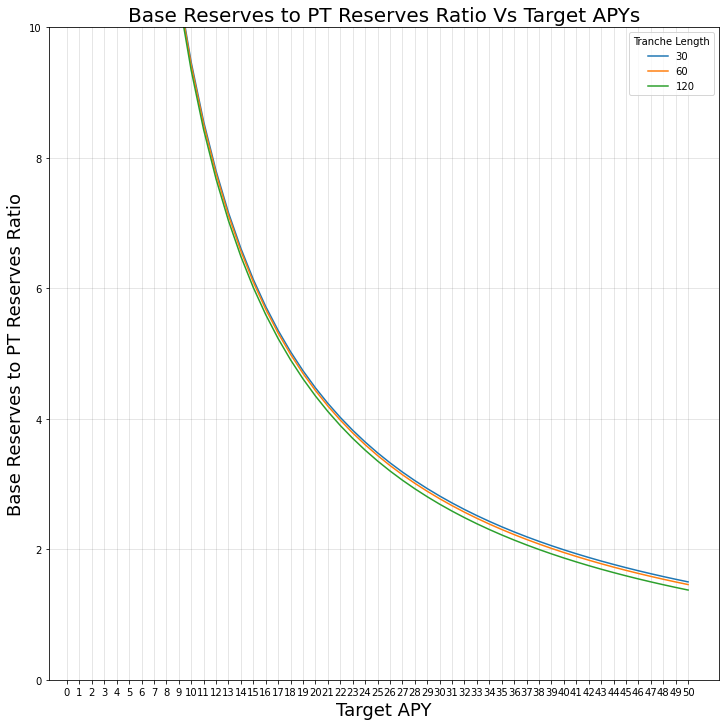

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))
time_stretch=1

for tranche_length in [30,60,120]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 51, 1):
      days_until_maturity = tranche_length
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves/y_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("Target APY",fontsize=18)
    ax.set_ylabel("Base Reserves to PT Reserves Ratio",fontsize=18)
    ax.set_xticks(np.arange(0, 51, 1))
    ax.set_ylim(0,10)
    #ax.set_yticks(np.arange(0, 105, 5))
    ax.plot(x, y,label=tranche_length)
    ax.legend(title="Tranche Length")
plt.title("Base Reserves to PT Reserves Ratio Vs Target APYs",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

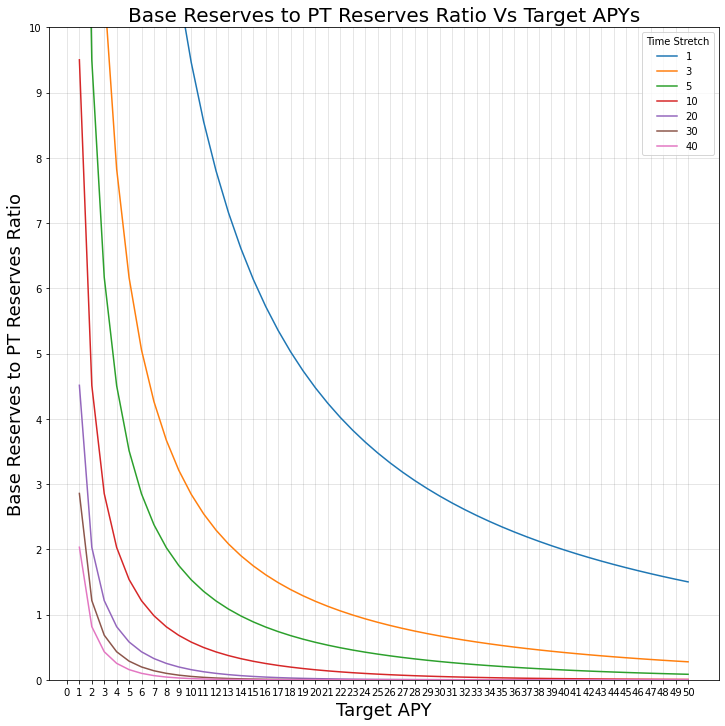

In [32]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))

for time_stretch in [1,3,5,10,20,30,40]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 51, 1):
      days_until_maturity = 30
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves/y_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("Target APY",fontsize=18)
    ax.set_ylabel("Base Reserves to PT Reserves Ratio",fontsize=18)
    ax.set_xticks(np.arange(0, 51, 1))
    ax.set_ylim(0,10)
    ax.set_yticks(np.arange(0, 11, 1))
    ax.plot(x, y,label=time_stretch)
    ax.legend(title="Time Stretch")
plt.title("Base Reserves to PT Reserves Ratio Vs Target APYs",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

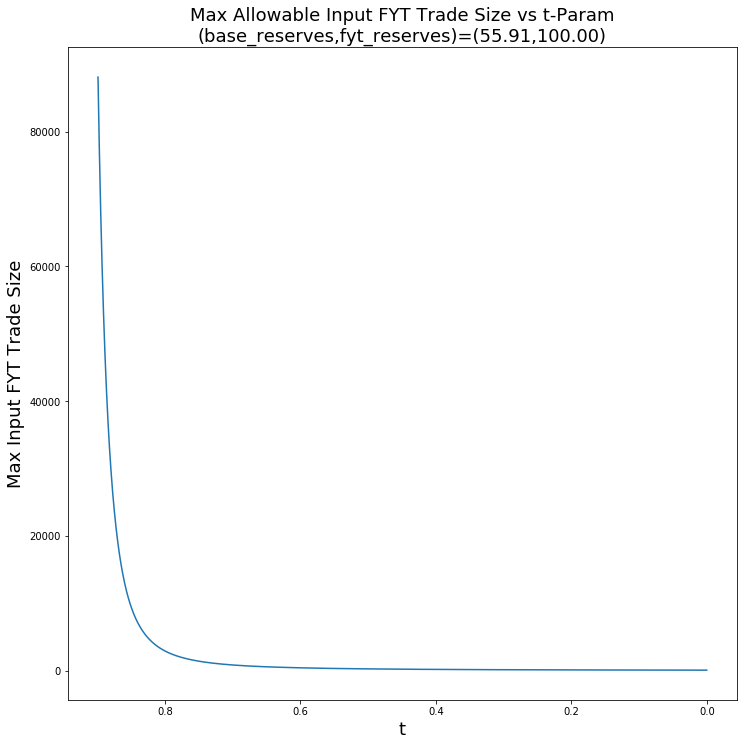

In [5]:
import numpy as np
import matplotlib.pyplot as plt

APY = 20
days_until_maturity = 90
time_stretch = 5
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
total_supply=x_reserves
epsilon=.0000001

times = []
max_trade_amounts = []

for t in np.arange(328, 0, -.1):
  times.append(t/365)
  max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/365)-epsilon
  max_trade_amounts.append(max_trade)


fig, ax = plt.subplots(figsize=(12,12))

x=times
y=max_trade_amounts
ax.set_title("Max Allowable Input FYT Trade Size vs t-Param\n(base_reserves,fyt_reserves)=({:.2f},{:.2f})".format(x_reserves,y_reserves),fontsize=18)
ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("Max Input FYT Trade Size",fontsize=18)
ax.invert_xaxis()
ax.plot(x, y)

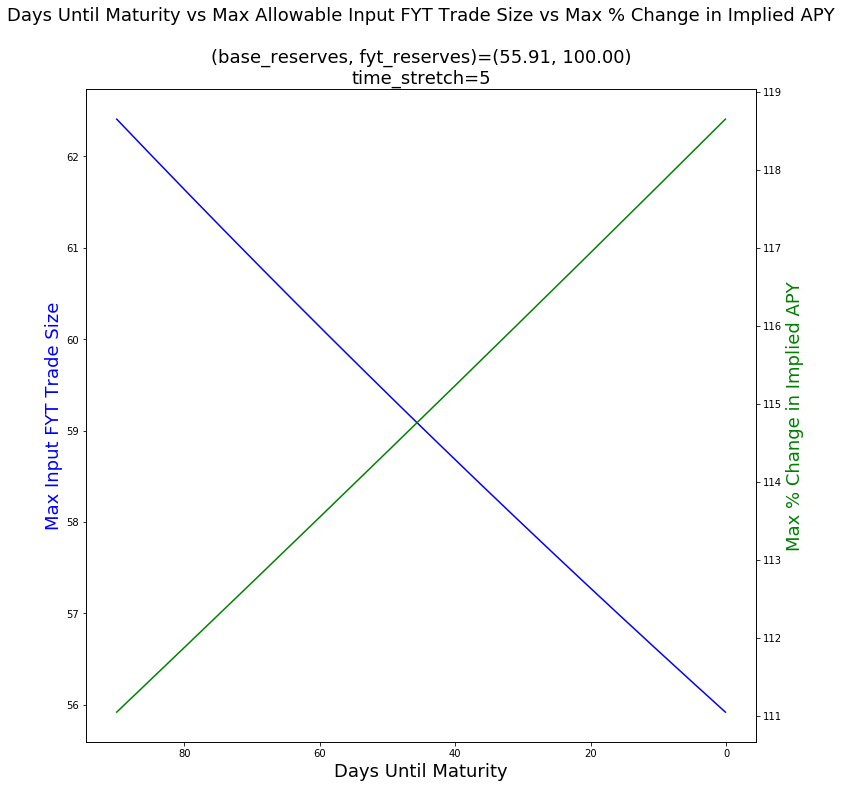

In [6]:
import matplotlib.pyplot as plt
import numpy as np
APY = 20
days_until_maturity = 90
time_stretch = 5
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
total_supply=x_reserves
epsilon=.0000001

times = []
days_until_maturity_list = []
max_trade_amounts = []
resulting_apys = []

for t in np.arange(days_until_maturity, 0, -.1):
  times.append(t/(365*time_stretch))
  days_until_maturity_list.append(t)
  max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
  max_trade_amounts.append(max_trade)
  (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",.05,t/(365*time_stretch))
  resulting_apy=calc_apy(without_fee/max_trade,t)
  resulting_apys.append((resulting_apy-APY)/APY * 100)

fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()

x = days_until_maturity_list
y1 = max_trade_amounts
ax1.set_title("Days Until Maturity vs Max Allowable Input FYT Trade Size vs Max % Change in Implied APY\n\n(base_reserves, fyt_reserves)=({:.2f}, {:.2f})\ntime_stretch={:}".format(x_reserves,y_reserves,time_stretch),fontsize=18)
ax1.set_xlabel("Days Until Maturity",fontsize=18)
ax1.set_ylabel("Max Input FYT Trade Size",fontsize=18,color='b')
ax1.invert_xaxis()
ax1.plot(x, y1,'b-')

y2 = resulting_apys
ax2.set_ylabel("Max % Change in Implied APY",fontsize=18,color='g')
ax2.plot(x, y2,'g-')

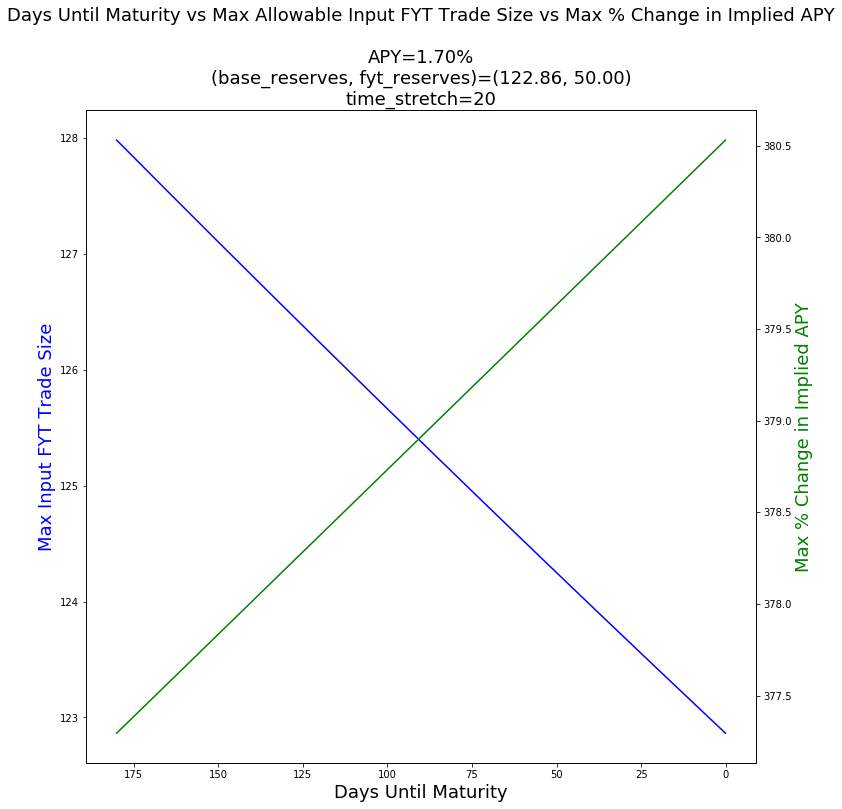

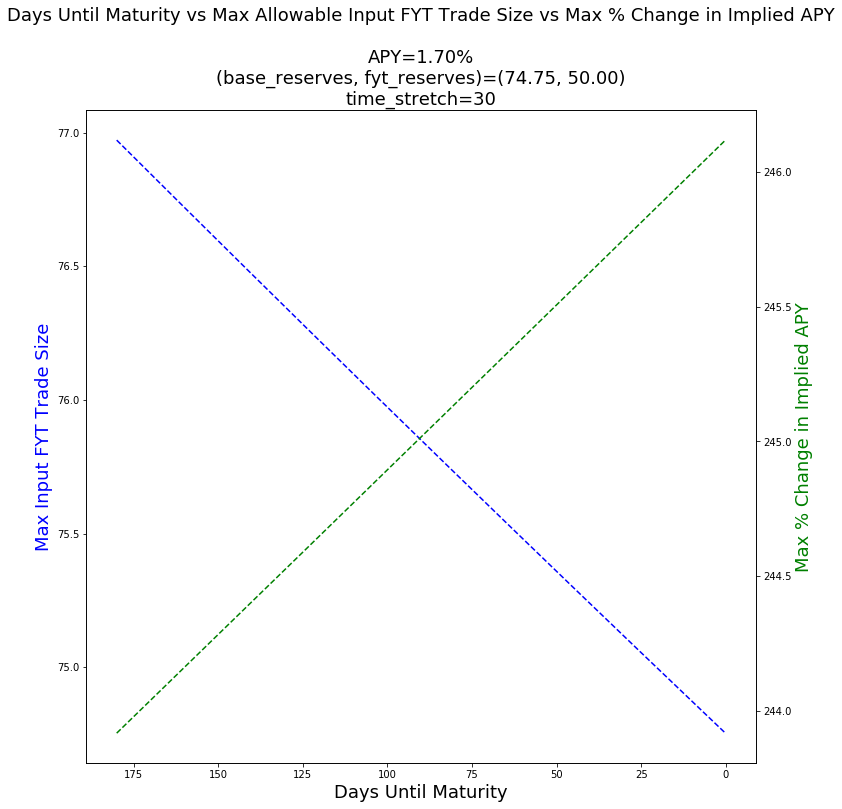

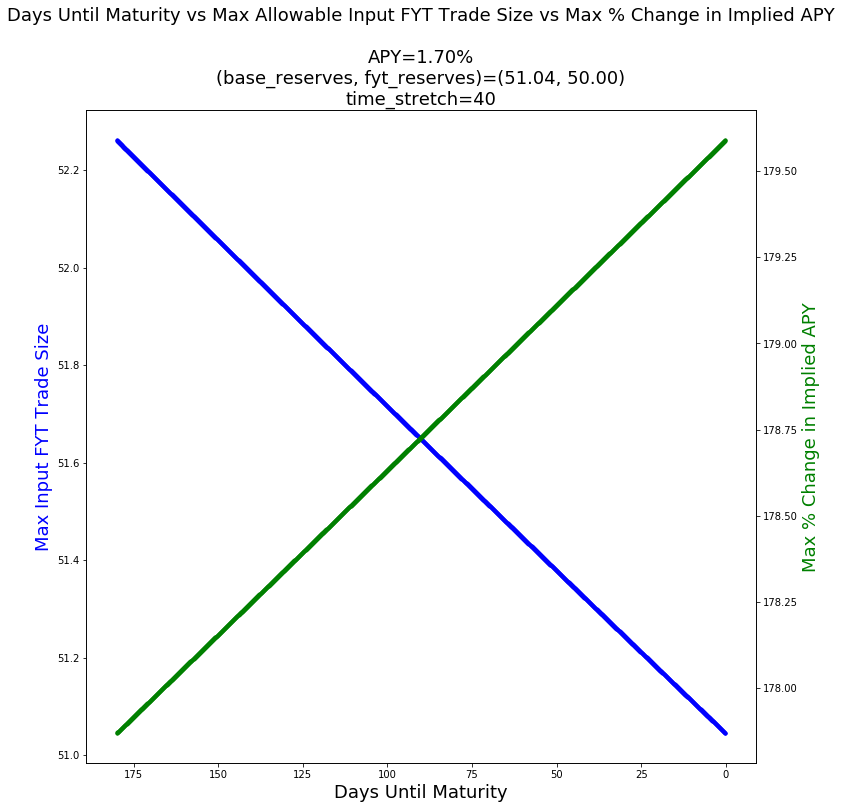

In [7]:

import matplotlib.pyplot as plt
import numpy as np

for time_stretch in [20,30,40]:
  fig, ax1 = plt.subplots(figsize=(12,12))
  APY = 1.7
  days_until_maturity = 180
  y_reserves = 50
  x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
  total_supply=x_reserves
  epsilon=.0000001

  times = []
  days_until_maturity_list = []
  max_trade_amounts = []
  resulting_apys = []

  for t in np.arange(days_until_maturity, 0, -.1):
    times.append(t/(365*time_stretch))
    days_until_maturity_list.append(t)
    max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
    max_trade_amounts.append(max_trade)
    (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",.05,t/(365*time_stretch))
    resulting_apy=calc_apy(without_fee/max_trade,t)
    resulting_apys.append((resulting_apy-APY)/APY * 100)


  ax2 = ax1.twinx()

  x = days_until_maturity_list
  y1 = max_trade_amounts
  ax1.set_title("Days Until Maturity vs Max Allowable Input FYT Trade Size vs Max % Change in Implied APY\n\nAPY={:.2f}%\n(base_reserves, fyt_reserves)=({:.2f}, {:.2f})\ntime_stretch={:}".format(APY,x_reserves,y_reserves,time_stretch),fontsize=18)
  ax1.set_xlabel("Days Until Maturity",fontsize=18)
  ax1.set_ylabel("Max Input FYT Trade Size",fontsize=18,color='b')
  ax1.invert_xaxis()
  y2 = resulting_apys
  ax2.set_ylabel("Max % Change in Implied APY",fontsize=18,color='g')

  if time_stretch == 20: 
    ax1.plot(x, y1,'b-')
    ax2.plot(x, y2,'g-')
  elif time_stretch == 30:
    ax1.plot(x, y1,'b--')
    ax2.plot(x, y2,'g--')
  elif time_stretch == 40:
    ax1.plot(x, y1,'b.')
    ax2.plot(x, y2,'g.')




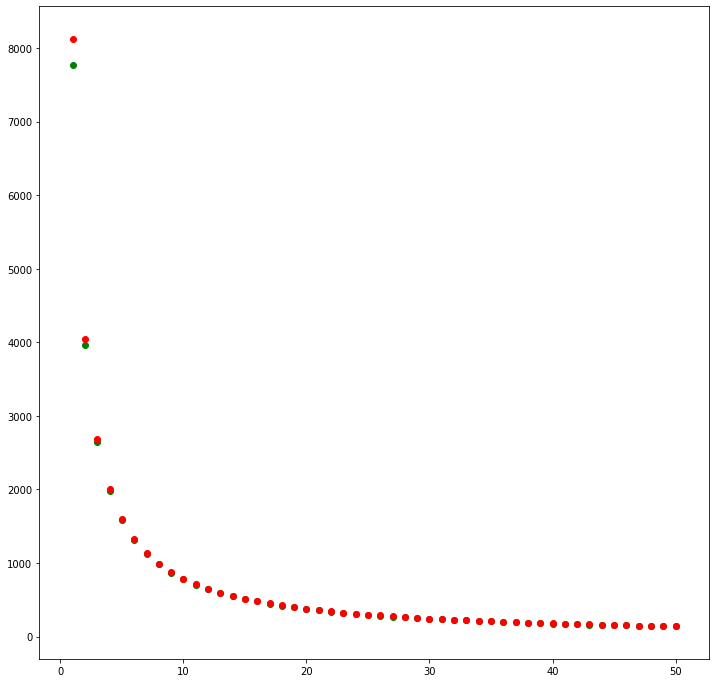

In [8]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12,12))

min_apy_changes = []
max_apy_changes = []
time_stretches = []
for time_stretch in np.arange(1, 51, 1):
  APY = 1.7
  days_until_maturity = 180
  y_reserves = 50
  x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
  total_supply=x_reserves
  epsilon=.0000001

  times = []
  days_until_maturity_list = []
  max_trade_amounts = []
  resulting_apys = []

  for t in np.arange(days_until_maturity, 0, -.1):
    times.append(t/(365*time_stretch))
    days_until_maturity_list.append(t)
    max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
    max_trade_amounts.append(max_trade)
    (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",.05,t/(365*time_stretch))
    resulting_apy=calc_apy(without_fee/max_trade,t)
    resulting_apys.append((resulting_apy-APY)/APY * 100)

  time_stretches.append(time_stretch)
  min_apy_changes.append(min(resulting_apys))
  max_apy_changes.append(max(resulting_apys))

ax1.scatter(time_stretches,min_apy_changes,color='g')
ax1.scatter(time_stretches,max_apy_changes,color='r')
#ax1.set_ylim(0,1000)

# this plot tells me that the difference between the min and max % change apy isnt very much

In [75]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cols = ["apy","tranche_length","time_stretch",\
        "x_reserves", "y_reserves",\
        "min_k","max_k",\
        "min_trade_amount","max_trade_amount",\
        "min_resulting_fyt_unit_prices","max_resulting_fyt_unit_prices",\
        "min_resulting_apy","max_resulting_apy",\
        "min_apy_change","max_apy_change"]


tests = []

for y_reserves in np.arange(50, 1010, 50):
  for tranche_length in np.arange(30, 181, 30):
    for APY in np.arange(1, 51, 1):
      for time_stretch in np.arange(1, 41, 1):
        days_until_maturity = tranche_length
        x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
        total_supply=x_reserves
        epsilon=.0000001

        times = []
        days_until_maturity_list = []
        ks = []
        max_trade_amounts = []
        resulting_fyt_unit_prices = []
        resulting_apys = []
        resulting_apy_changes = []

        for day in np.arange(days_until_maturity, 0, -1):
          times.append(day/(365*time_stretch))
          days_until_maturity_list.append(day)
          k=calc_k(y_reserves+total_supply,x_reserves,day/(365*time_stretch))
          ks.append(k)
          max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,day/(365*time_stretch))-epsilon
          max_trade_amounts.append(max_trade)
          (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",.05,day/(365*time_stretch))
          resulting_fyt_unit_price = without_fee/max_trade
          resulting_fyt_unit_prices.append(resulting_fyt_unit_price)
          resulting_apy=calc_apy(resulting_fyt_unit_price,day)
          resulting_apys.append(resulting_apy)
          resulting_apy_changes.append((resulting_apy-APY)/APY * 100)

        test = [APY,tranche_length,time_stretch,x_reserves,y_reserves,\
                min(ks),max(ks),\
                min(max_trade_amounts),max(max_trade_amounts),\
                min(resulting_fyt_unit_prices),max(resulting_fyt_unit_prices),\
                min(resulting_apys), max(resulting_apys),\
                min(resulting_apy_changes),max(resulting_apy_changes)]
        tests.append(test)

df = pd.DataFrame(tests,columns=cols)
#df.to_csv('apy_change.csv')
df

,apy,tranche_length,time_stretch,x_reserves,y_reserves,min_k,max_k,min_trade_amount,max_trade_amount,min_resulting_fyt_unit_prices,max_resulting_fyt_unit_prices,min_resulting_apy,max_resulting_apy,min_apy_change,max_apy_change
0,1,30,1,4.972987e+03,50,4963.798217,9765.430280,4.992039e+03,5.613117e+03,0.885958,0.996183,138.750893,139.305986,13775.089279,13830.598626
1,1,30,2,2.474056e+03,50,3623.852139,4944.830812,2.478810e+03,2.624748e+03,0.942588,0.998082,69.851337,70.004936,6885.133676,6900.493592
2,1,30,3,1.641107e+03,50,2719.353525,3309.714748,1.643218e+03,1.706798e+03,0.961512,0.998715,46.827060,46.903542,4582.706001,4590.354194
3,1,30,4,1.224653e+03,50,2158.663806,2487.128765,1.225840e+03,1.261252e+03,0.970982,0.999031,35.305117,35.353009,3430.511653,3435.300868
4,1,30,5,9.747974e+02,50,1784.950510,1992.040367,9.755571e+02,9.980863e+02,0.976666,0.999221,28.389121,28.422970,2738.912121,2742.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,50,180,36,1.056593e-06,1000,909.712392,999.474436,9.583362e-07,1.321863e-06,0.745139,0.998371,51.680216,59.452905,3.360432,18.905809
239996,50,180,37,5.950749e-07,1000,912.041940,999.488636,4.960553e-07,7.004952e-07,0.746323,0.998381,51.440017,59.088871,2.880035,18.177742
239997,50,180,38,3.351473e-07,1000,914.254384,999.502089,2.356996e-07,3.506807e-07,0.747804,0.998394,51.139816,58.619649,2.279632,17.239299
239998,50,180,39,1.887556e-07,1000,916.358330,999.514853,8.906667e-08,1.537388e-07,0.749634,0.998407,50.768760,58.141352,1.537520,16.282703


In [132]:
#df.to_csv('apy_change.csv')
pd.set_option('display.max_rows', None)
df['reserve_ratio']=df['x_reserves']/df['y_reserves']

reserve_ratio_filter=(df['reserve_ratio']>=1/2)&(df['reserve_ratio']<=2/1)
price_discovery_filter=(df['max_apy_change']>=50)
df_filtered = df[reserve_ratio_filter & price_discovery_filter].reset_index()

apy_t_stretches=[]
for APY in np.arange(1, 51, 1):
    min_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].min()
    max_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].max()
    min_tl=df_filtered[(df_filtered['apy']==APY)&(df_filtered['time_stretch']>=min_ts)&(df_filtered['time_stretch']<=max_ts)]['tranche_length'].min()
    max_tl=df_filtered[(df_filtered['apy']==APY)&(df_filtered['time_stretch']>=min_ts)&(df_filtered['time_stretch']<=max_ts)]['tranche_length'].max()
    apy_t_stretches.append((APY,min_ts,max_ts,min_tl,max_tl))
    
apy_t_stretches    

[(1, nan, nan, nan, nan),
 (2, 21, 40, 30, 180),
 (3, 14, 36, 30, 180),
 (4, 11, 27, 30, 180),
 (5, 9, 21, 30, 180),
 (6, 7, 18, 30, 180),
 (7, 6, 15, 30, 180),
 (8, 5, 13, 30, 180),
 (9, 5, 12, 30, 180),
 (10, 4, 10, 30, 180),
 (11, 4, 9, 30, 180),
 (12, 4, 9, 30, 180),
 (13, 4, 8, 30, 180),
 (14, 3, 7, 30, 180),
 (15, 3, 7, 30, 180),
 (16, 3, 6, 30, 180),
 (17, 3, 6, 30, 180),
 (18, 3, 6, 30, 180),
 (19, 3, 5, 30, 180),
 (20, 2, 5, 30, 180),
 (21, 2, 5, 30, 180),
 (22, 2, 4, 30, 180),
 (23, 2, 4, 30, 180),
 (24, 2, 4, 30, 180),
 (25, 2, 4, 30, 180),
 (26, 2, 4, 30, 180),
 (27, 2, 4, 30, 180),
 (28, 2, 3, 30, 180),
 (29, 2, 3, 30, 180),
 (30, 2, 3, 30, 180),
 (31, 2, 3, 30, 180),
 (32, 2, 3, 30, 180),
 (33, 2, 3, 30, 180),
 (34, 2, 3, 30, 180),
 (35, 2, 3, 30, 180),
 (36, 2, 3, 30, 180),
 (37, 1, 2, 30, 180),
 (38, 1, 2, 30, 180),
 (39, 1, 2, 30, 180),
 (40, 1, 2, 30, 180),
 (41, 1, 2, 30, 180),
 (42, 1, 2, 30, 180),
 (43, 1, 2, 30, 180),
 (44, 1, 2, 30, 180),
 (45, 1, 2, 30, 180),
 (

Text(0, 0.5, 'Time Stretch')

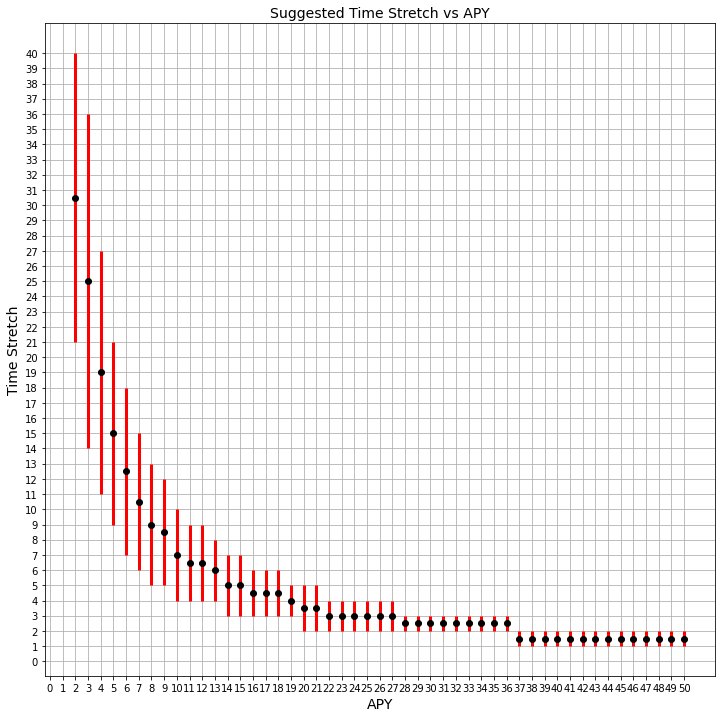

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))
apys = [apy for apy,min_ts,max_ts,min_tl,max_tl in apy_t_stretches]
mean_tss= [(min_ts+max_ts)/2 for apy,min_ts,max_ts,min_tl,max_tl in apy_t_stretches]
err_tss= [max_ts-(min_ts+max_ts)/2 for apy,min_ts,max_ts,min_tl,max_tl in apy_t_stretches]
plt.yticks(np.arange(0,41, 1))
plt.xticks(np.arange(0,51, 1))
plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
             ecolor='red', elinewidth=3, capsize=0);
plt.grid(True)
plt.title('Suggested Time Stretch vs APY', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

In [36]:
APY = 1
tranche_length = 30
days_until_maturity = 1
time_stretch = 5
y_reserves = 50
x_reserves = calc_x_reserves(APY,y_reserves,tranche_length,time_stretch)
total_supply=x_reserves
print("required x_reserves: " + str(x_reserves))
g=0.05
t=days_until_maturity/(365*time_stretch)
k=calc_k(y_reserves+total_supply,x_reserves,t)
print("k: " + str(k))
print("k^(1/(1-t)): " + str(k**(1/(1-t))))
max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t) - .0001
print("max valid trade = {:}".format(max_trade))
(with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t)
print("Total Price after max trade: " + str(without_fee))
unit_price = without_fee/max_trade
print("Unit Price after max trade: " + str(unit_price))
resulting_apy=calc_apy(unit_price,1)
print("resulting apy: " + str(resulting_apy))
(resulting_apy-APY)/APY * 100

required x_reserves: 974.7973950829826
k: 1992.0403670320047
k^(1/(1-t)): 2000.3544676827012
max valid trade = 975.5569725997186
Total Price after max trade: 974.7972960547493
Unit Price after max trade: 0.9992212894107609
resulting apy: 28.42293650722577


2742.2936507225772

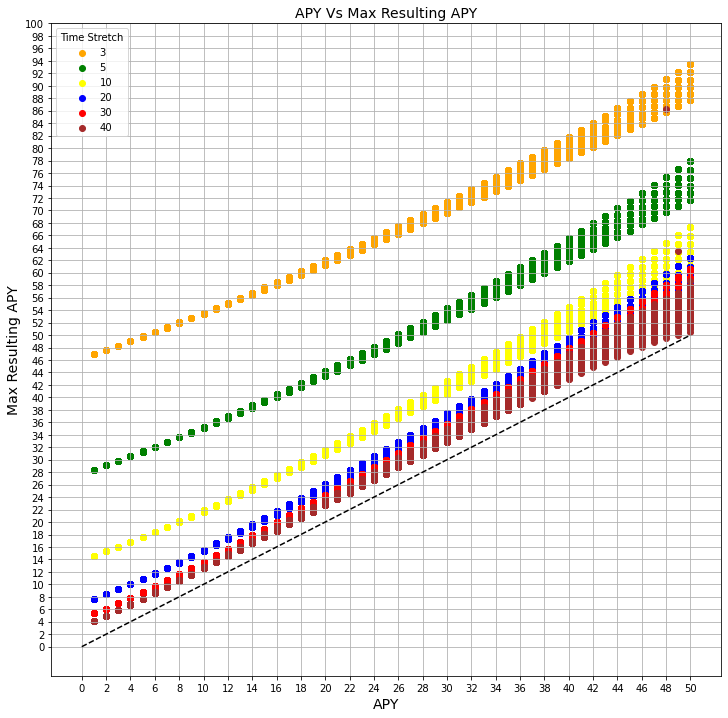

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='orange',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==5) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==10) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='yellow',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==20) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==30) & (df['tranche_length']<=180)]
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='red',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==40) & (df['tranche_length']<=180)]
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='brown',label= df_filtered['time_stretch'].iloc[0])


plt.title('APY Vs Max Resulting APY', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Max Resulting APY', fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
x = np.arange(0,51,1)
y = x
plt.plot(x, y, '--', color="black")
plt.yticks(np.arange(0,101, 2))
plt.xticks(np.arange(0,51, 2))
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

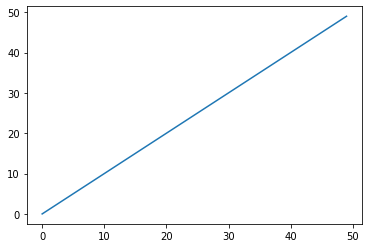

In [61]:
x = np.arange(0,50,1)
y = x
plt.plot(x, y)

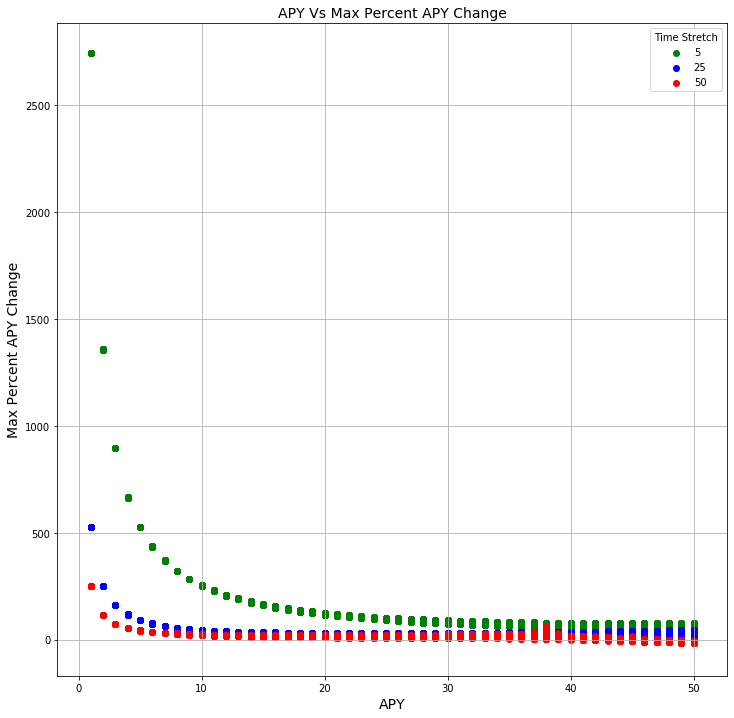

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['time_stretch']==5]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==25]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==50]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='red',label= df_filtered['time_stretch'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

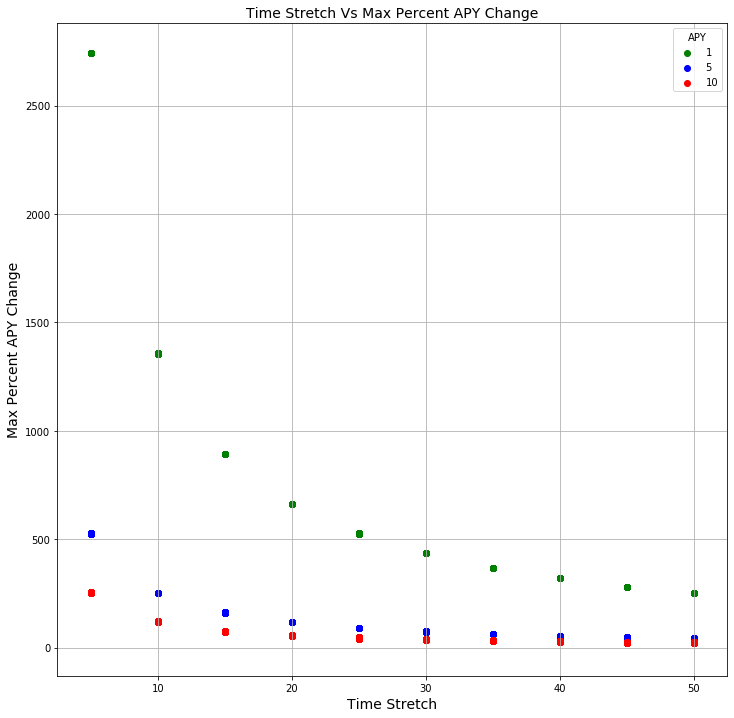

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('Time Stretch Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Time Stretch', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY")
plt.show()


### This tells me that time stretch does have an affect on Max % APY Change

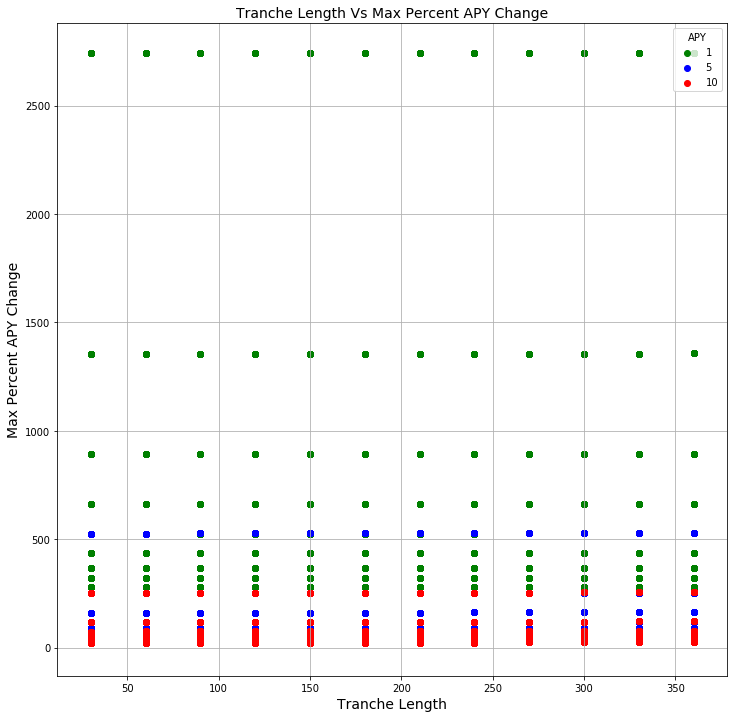

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='blue', label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('Tranche Length Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Tranche Length', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY", loc='upper right')
plt.show()

## This tells me that Tranche Length has virtually no affect on Max % APY Change

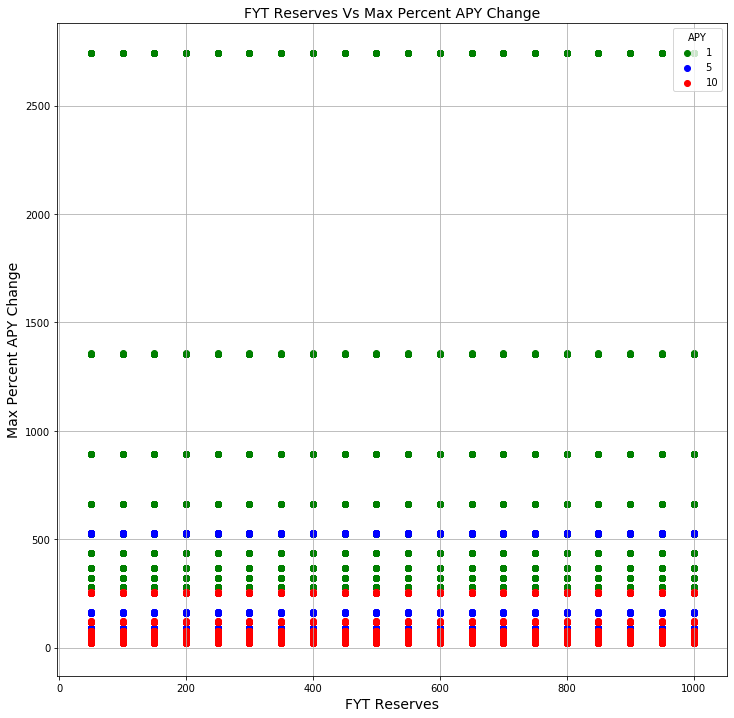

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('FYT Reserves Vs Max Percent APY Change', fontsize=14)
plt.xlabel('FYT Reserves', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY", loc='upper right')
plt.show()

## This tells me that reserve size has virtually no affect on Max % APY Change

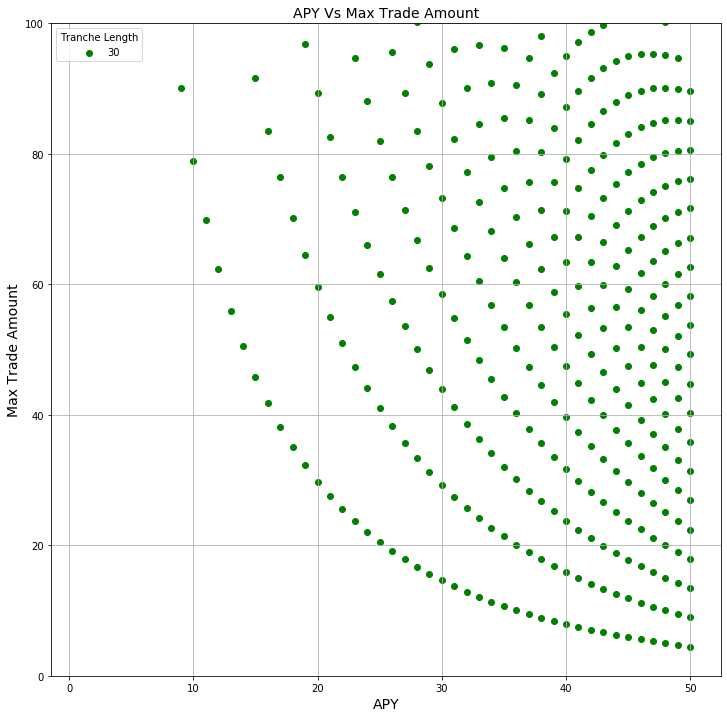

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==50) & (df['tranche_length']==30)]
df_filtered = df[(df['time_stretch']==5)  & (df['tranche_length']==30)]

plt.scatter(df_filtered['apy'], df_filtered['max_trade_amount'], color='green',label= df_filtered['tranche_length'].iloc[0])

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==500) & (df['tranche_length']==30)]

#plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='blue',label= df_filtered['y_reserves'].iloc[0])

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==1000) & (df['tranche_length']==30)]

#plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='red',label= df_filtered['y_reserves'].iloc[0])

plt.title('APY Vs Max Trade Amount', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Max Trade Amount', fontsize=14)
plt.grid(True)
plt.legend(title="Tranche Length")
plt.ylim(0,100)
plt.show()


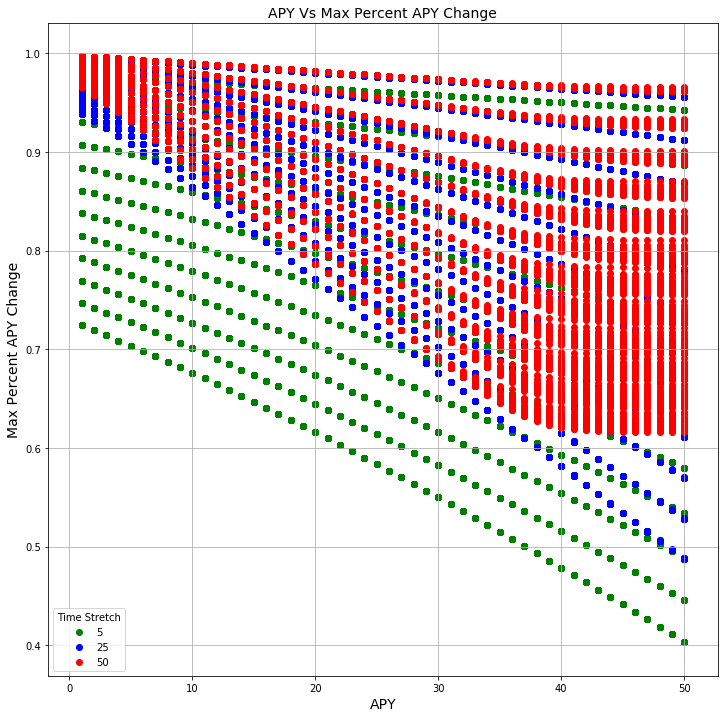

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['time_stretch']==5]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==25]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==50]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='red',label= df_filtered['time_stretch'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Min Unit FYT Price, fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

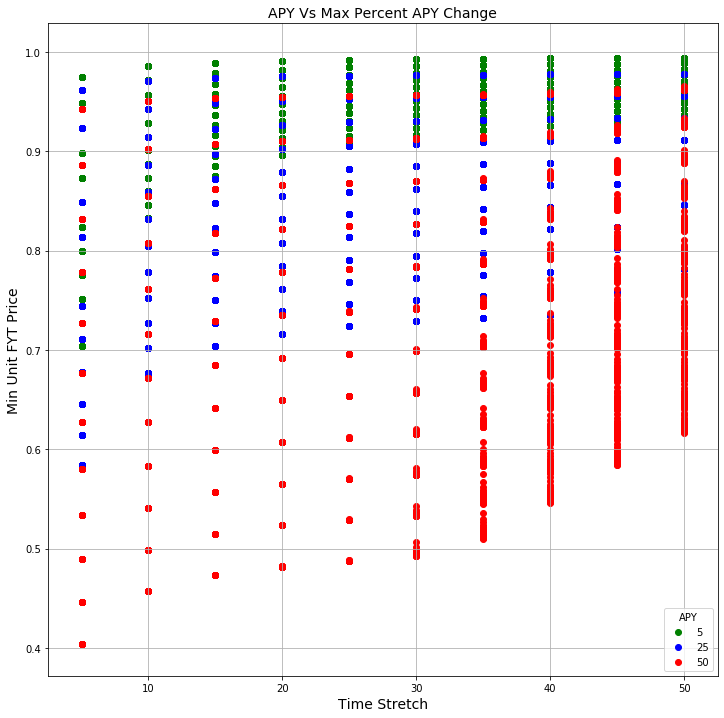

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==25]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==50]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Time Stretch', fontsize=14)
plt.ylabel('Min Unit FYT Price', fontsize=14)
plt.grid(True)
plt.legend(title="APY")
plt.show()

